In [2]:
import sys
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path().resolve().parents[1]
sys.path.append(str(PROJECT_ROOT))


In [3]:
from src.pipelines.extracao_ocorrencias import extract_ocorrencias
from src.pipelines.transformacao_ocorrencias import transform_ocorrencias

df = extract_ocorrencias()
df = transform_ocorrencias(df)
df.head()

,id,dataHoraChamada,naturezaOcorrenciaId,grupoOcorrenciaId,subgrupoOcorrenciaId,unidadeOperacionalId,municipio,data,hora,dia_semana,mes,ano,fim_de_semana,atendida,turno,municipio_freq
0,1,2025-01-01 00:40:00,1,1,1,3,jaboatão dos guararapes,2025-01-01,0,2,1,2025,0,1,madrugada,0.150713
1,2,2025-01-01 01:08:00,1,2,2,3,jaboatão dos guararapes,2025-01-01,1,2,1,2025,0,1,madrugada,0.150713
2,3,2025-01-01 00:30:00,1,3,37,3,jaboatão dos guararapes,2025-01-01,0,2,1,2025,0,1,madrugada,0.150713
3,4,2025-01-01 11:27:00,1,2,24,6,recife,2025-01-01,11,2,1,2025,0,1,manha,0.432500
4,5,2025-01-31 03:48:00,1,4,5,2,recife,2025-01-31,3,4,1,2025,0,0,madrugada,0.432500


In [4]:
df.describe()

,id,dataHoraChamada,naturezaOcorrenciaId,grupoOcorrenciaId,subgrupoOcorrenciaId,unidadeOperacionalId,hora,dia_semana,mes,ano,fim_de_semana,atendida,municipio_freq
count,12474.000000,12474,12474.000000,12474.000000,12474.000000,12474.000000,12474.000000,12474.000000,12474.000000,12474.0,12474.000000,12474.000000,12474.000000
mean,6604.717252,2025-05-20 19:39:47.966490112,2.424483,19.627305,63.764711,3.414222,13.065977,3.076239,5.124900,2025.0,0.300465,0.779301,0.248055
min,1.000000,2025-01-01 00:30:00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2025.0,0.000000,0.000000,0.000080
25%,3399.250000,2025-03-11 18:29:00,1.000000,3.000000,30.000000,3.000000,8.000000,1.000000,3.000000,2025.0,0.000000,1.000000,0.073353
50%,6588.500000,2025-05-18 13:14:30,1.000000,6.000000,37.000000,3.000000,14.000000,3.000000,5.000000,2025.0,0.000000,1.000000,0.164502
75%,9808.750000,2025-07-28 07:52:30,4.000000,44.000000,104.000000,4.000000,17.000000,5.000000,7.000000,2025.0,1.000000,1.000000,0.432500
max,12956.000000,2025-12-15 06:42:00,6.000000,57.000000,235.000000,14.000000,23.000000,6.000000,12.000000,2025.0,1.000000,1.000000,0.432500
std,3682.159027,NaN,1.774088,19.674633,64.268557,1.298067,5.400015,1.994149,2.666193,0.0,0.458479,0.414735,0.167062


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12474 entries, 0 to 12473
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    12474 non-null  int64         
 1   dataHoraChamada       12474 non-null  datetime64[ns]
 2   naturezaOcorrenciaId  12474 non-null  int64         
 3   grupoOcorrenciaId     12474 non-null  int64         
 4   subgrupoOcorrenciaId  12474 non-null  int64         
 5   unidadeOperacionalId  12474 non-null  int64         
 6   municipio             12474 non-null  object        
 7   data                  12474 non-null  object        
 8   hora                  12474 non-null  int32         
 9   dia_semana            12474 non-null  int32         
 10  mes                   12474 non-null  int32         
 11  ano                   12474 non-null  int32         
 12  fim_de_semana         12474 non-null  int64         
 13  atendida        

In [6]:
df_diario = (
    df
    .groupby(["data", "municipio"])
    .agg(
        qtd_ocorrencias=("id", "count"),
        dia_semana=("dia_semana", "first"),
        mes=("mes", "first"),
        ano=("ano", "first"),
        fim_de_semana=("fim_de_semana", "first"),
        municipio_freq=("municipio_freq", "first")
    )
    .reset_index()
)
df_diario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             2353 non-null   object 
 1   municipio        2353 non-null   object 
 2   qtd_ocorrencias  2353 non-null   int64  
 3   dia_semana       2353 non-null   int32  
 4   mes              2353 non-null   int32  
 5   ano              2353 non-null   int32  
 6   fim_de_semana    2353 non-null   int64  
 7   municipio_freq   2353 non-null   float64
dtypes: float64(1), int32(3), int64(2), object(2)
memory usage: 119.6+ KB


In [22]:
df_diario['municipio'].value_counts()

municipio
recife                                              303
olinda                                              296
jaboatão dos guararapes                             291
paulista                                            273
fernando de noronha, ilha de fernando de noronha    260
são lourenço da mata                                180
camaragibe                                          176
abreu e lima                                        142
cabo de santo agostinho                             136
igarassu                                            125
ipojuca                                              64
moreno                                               48
ilha de itamaracá                                    23
itapissuma                                           20
araçoiaba                                             3
taquaritinga do norte                                 3
carpina                                               2
timbaúba                              

In [7]:
df_diario.describe()

,qtd_ocorrencias,dia_semana,mes,ano,fim_de_semana,municipio_freq
count,2353.000000,2353.000000,2353.000000,2353.0,2353.000000,2353.000000
mean,5.301317,2.995325,5.326392,2025.0,0.282193,0.117222
std,6.115921,1.997974,2.781692,0.0,0.450162,0.133194
min,1.000000,0.000000,1.000000,2025.0,0.000000,0.000080
25%,1.000000,1.000000,3.000000,2025.0,0.000000,0.023489
50%,3.000000,3.000000,5.000000,2025.0,0.000000,0.060606
75%,7.000000,5.000000,8.000000,2025.0,1.000000,0.164502
max,39.000000,6.000000,12.000000,2025.0,1.000000,0.432500


In [8]:
df_model = df_diario.sort_values(["municipio", "data"])


df_model["ocorrencias_dia_anterior"] = (
    df_model
    .groupby("municipio")["qtd_ocorrencias"]
    .shift(1)
)

df_model["ocorrencias_semana_anterior"] = (
    df_model
    .groupby("municipio")["qtd_ocorrencias"]
    .shift(7)
)

df_model["media_movel_7_dias"] = (
    df_model
    .groupby("municipio")["qtd_ocorrencias"]
    .rolling(window=7, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

df_model = df_model.dropna()



In [9]:
features = [
    "dia_semana",
    "mes",
    "fim_de_semana",
    "municipio_freq",
    "ocorrencias_dia_anterior",
    "ocorrencias_semana_anterior",
    "media_movel_7_dias"
]

target = "qtd_ocorrencias"

X = df_model[features]
y = df_model[target]


In [10]:
from sklearn.model_selection import train_test_split

split_date = pd.to_datetime("2025-05-01").date()

train_mask = df_model["data"] < split_date
test_mask  = df_model["data"] >= split_date

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]


In [11]:
y_pred_baseline = X_test["media_movel_7_dias"]

from sklearn.metrics import mean_absolute_error, r2_score

print("MAE baseline:", mean_absolute_error(y_test, y_pred_baseline))
print("R² baseline:", r2_score(y_test, y_pred_baseline))


MAE baseline: 1.5153400105429626
R² baseline: 0.8376713295628058


In [12]:
import numpy as np

y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)


In [13]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train_log)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [14]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)


In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R²:", r2)
print("Erro relativo médio (%):", mae / y_test.mean() * 100)


MAE: 1.6081520397284814
R²: 0.8084622621536255
Erro relativo médio (%): 31.598695096173028


In [16]:
import pandas as pd

importances = pd.Series(
    model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(10)


municipio_freq                 0.500552
media_movel_7_dias             0.290601
ocorrencias_dia_anterior       0.094905
ocorrencias_semana_anterior    0.038165
fim_de_semana                  0.025817
dia_semana                     0.025359
mes                            0.024601
dtype: float32

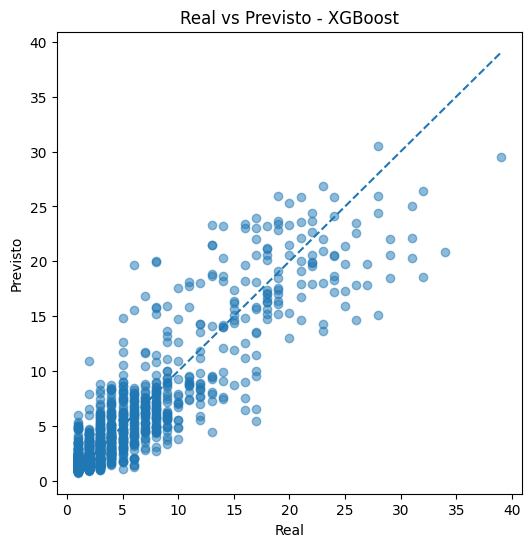

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    '--'
)
plt.xlabel("Real")
plt.ylabel("Previsto")
plt.title("Real vs Previsto - XGBoost")
plt.show()


# O modelo apresenta boa capacidade preditiva, especialmente para volumes baixos e médios de ocorrências, que representam a maior parte dos casos operacionais.

In [18]:
import joblib

joblib.dump(model, r"E:\ViniciusDoc\Projetos\ML_P.I_CBMPE\models\xgb_ocorrencias_diario.pkl")
joblib.dump(features, r"E:\ViniciusDoc\Projetos\ML_P.I_CBMPE\models\features_modelo.pkl")

['E:\\ViniciusDoc\\Projetos\\ML_P.I_CBMPE\\models\\features_modelo.pkl']